In [11]:
pip install opencv-python


   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB 667.8 kB/s eta 0:00:59
   ---------------------------------------- 0.1/38.8 MB 656.4 kB/s eta 0:01:00
   ---------------------------------------- 0.1/38.8 MB 722.1 kB/s eta 0:00:54
   ---------------------------------------- 0.2/38.8 MB 706.2 kB/s eta 0:00:55
   ---------------------------------------- 0.2/38.8 MB 706.2 kB/s eta 0:00:55
   ---------------------------------------- 0.2/38.8 MB 553.5 kB/s eta 0:01:10
   ---------------------------------------- 0.3/38.8 MB 936.6 kB/s eta 0:00:42
   ---------------------------------------- 0.4/38.8 MB 919.0 kB/s eta 0:00:42
   ---------------------------------------- 0.4/38.8 MB 937.3 kB/s eta 0:00:41
   ---------------------------------------- 0.5/38.8 MB 962.7 kB/s eta 0:00:40
   ---------------------------------------- 0.5/38.8 MB 962.7 kB/s et

In [12]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [13]:
data_path = 'train'

In [14]:
images = []
labels = []

for filename in os.listdir(data_path):
    if "cat" in filename.lower():
        labels.append(1)  # 1 for cat
    elif "dog" in filename.lower():
        labels.append(0)  # 0 for dog
    else:
        continue

    image_path = os.path.join(data_path, filename)
    image = cv2.imread(image_path)
    image = cv2.resize(image, (64, 64))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    images.append(image.flatten())
    
X = np.array(images)
y = np.array(labels)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=69)

In [23]:
from sklearn.decomposition import PCA

n_components = 150

# Initialize PCA and fit on training data
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Initialize the SVM classifier
svm_model = SVC(kernel='rbf',gamma='scale', C=5.0, random_state=42)

# Train the model with reduced dimensions
svm_model.fit(X_train_pca, y_train)

y_pred = svm_model.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 65.87%


In [24]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Display the classification report
print(classification_report(y_test, y_pred))

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Accuracy: 65.87%
              precision    recall  f1-score   support

           0       0.65      0.68      0.67      4357
           1       0.67      0.63      0.65      4393

    accuracy                           0.66      8750
   macro avg       0.66      0.66      0.66      8750
weighted avg       0.66      0.66      0.66      8750

[[2980 1377]
 [1609 2784]]


In [25]:
data_test_path = 'test1'

In [27]:
test_images = []

img_width, img_height = 64, 64

for file_name in os.listdir(data_test_path):
    if file_name.endswith(".jpg") or file_name.endswith(".png"):
        img_path = os.path.join(data_test_path, file_name)
        
        img = cv2.imread(img_path)
        
        img = cv2.resize(img, (img_width, img_height))
        
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        img_flat = img.flatten()

        
        test_images.append(img_flat)

In [28]:
x_test_data=np.array(test_images)
x_test_data=pca.transform(x_test_data)
pred_test_data = svm_model.predict(x_test_data)

In [34]:
pred_test_data[21:36]

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0])

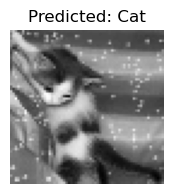

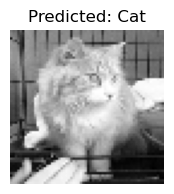

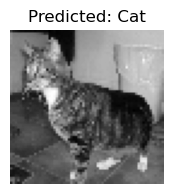

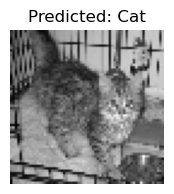

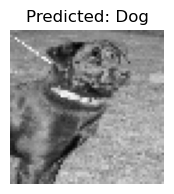

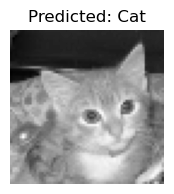

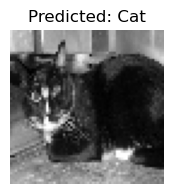

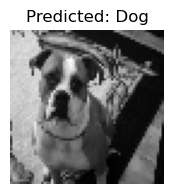

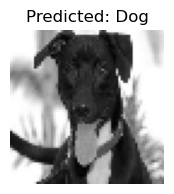

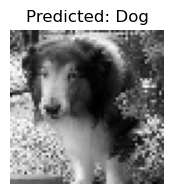

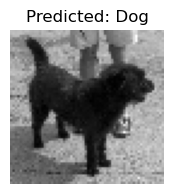

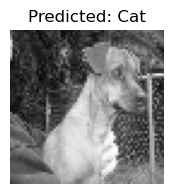

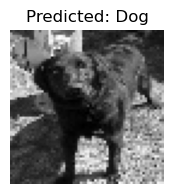

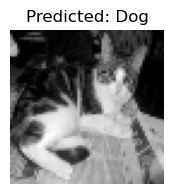

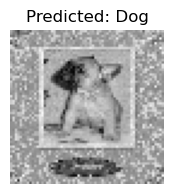

In [36]:
import matplotlib.pyplot as plt

start_index = 21
end_index = 36

for i in range(start_index, end_index):
    plt.figure(figsize=(2, 2))
    plt.imshow(test_images[i].reshape(64, 64), cmap='gray')  
    plt.title(f'Predicted: {"Cat" if pred_test_data[i] == 1 else "Dog"}')
    plt.axis('off')
    plt.show()